In [3]:
import pandas as pd
import json

data_for_analysis = pd.DataFrame()
with open('media_test.json', 'r') as file:
    for line in file:      
        data = json.loads(line)
        df = pd.json_normalize(data,  "changes", ["fetchdate_orig",	"fetchdate_check", "page_title", "title_new", "page_domain_root", "page_url", "num_changes", "perc_changedchars"])
        data_for_analysis = pd.concat([data_for_analysis, df], sort = False, axis = 0)


In [4]:
data_for_analysis = data_for_analysis.reset_index().drop(columns = ['index'])
data_for_analysis.head(30)

,from,to,from_range,to_range,fetchdate_orig,fetchdate_check,page_title,title_new,page_domain_root,page_url,num_changes,perc_changedchars
0,Шаги вперед:,Карьерный успех ждет трех знаков зодиака,0-1,0-5,2022-02-11 06:47:26 UTC,2022-02-18 06:47:27 UTC,Шаги вперед: в конце зимы эти знаки зодиака пр...,Карьерный успех ждет трех знаков зодиака в кон...,sb.by,https://www.sb.by/articles/shagi-vpered-v-kont...,2,79.23
1,эти знаки зодиака продвинутся по карьерной лес...,,5-11,9-9,2022-02-11 06:47:26 UTC,2022-02-18 06:47:27 UTC,Шаги вперед: в конце зимы эти знаки зодиака пр...,Карьерный успех ждет трех знаков зодиака в кон...,sb.by,https://www.sb.by/articles/shagi-vpered-v-kont...,2,79.23
2,Ð ÐÑÐºÑÑÑÐºÐµ,В Иркутске,0-1,0-1,2022-02-17 06:47:13 UTC,2022-02-18 06:48:12 UTC,Ð ÐÑÐºÑÑÑÐºÐµ 17 ÑÐµÐ²ÑÐ°Ð»Ñ Ð½Ð° Ð¿Ð...,В Иркутске 17 февраля на переезде столкнулись ...,i38.ru,https://i38.ru:443/proisshestviya-obichnie/v-i...,2,95.65
3,ÑÐµÐ²ÑÐ°Ð»Ñ Ð½Ð° Ð¿ÐµÑÐµÐµÐ·Ð´Ðµ ÑÑÐ¾Ð»Ð...,февраля на переезде столкнулись грузовик и теп...,3-9,3-9,2022-02-17 06:47:13 UTC,2022-02-18 06:48:12 UTC,Ð ÐÑÐºÑÑÑÐºÐµ 17 ÑÐµÐ²ÑÐ°Ð»Ñ Ð½Ð° Ð¿Ð...,В Иркутске 17 февраля на переезде столкнулись ...,i38.ru,https://i38.ru:443/proisshestviya-obichnie/v-i...,2,95.65
4,COVID-Ð½Ð¾Ð²Ð¾ÑÑÐ¸: Â«Ð¿ÑÐ¸Ñ Ð¾ÐºÐ¾Ð²Ð¸Ð´Â»...,"COVID-новости: «психоковид», как лечиться дома...",0-18,0-15,2022-02-17 06:47:23 UTC,2022-02-18 06:49:08 UTC,COVID-Ð½Ð¾Ð²Ð¾ÑÑÐ¸: Â«Ð¿ÑÐ¸Ñ Ð¾ÐºÐ¾Ð²Ð¸Ð´Â»...,"COVID-новости: «психоковид», как лечиться дома...",i38.ru,https://i38.ru:443/obschestvo-obichnie/covid-n...,1,100
5,В ДНР сообщили об обострении ситуации,Обстановка,0-5,0-0,2022-02-17 06:46:49 UTC,2022-02-18 06:48:08 UTC,В ДНР сообщили об обострении ситуации на линии...,Обстановка на линии соприкосновения резко обос...,regnum.ru,https://regnum.ru/news/polit/3509800.html,2,60.61
6,в Донбассе,резко обострилась — ЛНР,9-10,4-7,2022-02-17 06:46:49 UTC,2022-02-18 06:48:08 UTC,В ДНР сообщили об обострении ситуации на линии...,Обстановка на линии соприкосновения резко обос...,regnum.ru,https://regnum.ru/news/polit/3509800.html,2,60.61
7,,(17 февраля 2022 г.),4-4,4-7,2022-02-17 06:47:55 UTC,2022-02-18 06:49:25 UTC,Сегодня в Государственной Думе,Сегодня в Государственной Думе (17 февраля 202...,duma.gov.ru,http://duma.gov.ru/news/53463/,1,24.69
8,Выпущена в обращение,В Азербайджане появилась,0-2,0-2,2022-02-11 06:46:42 UTC,2022-02-18 06:46:31 UTC,Выпущена в обращение новая денежная купюра,В Азербайджане появилась новая 20-манатная купюра,news.day.az,https://news.day.az/economy/1434783.html,2,69.23
9,денежная,20-манатная,4-4,4-4,2022-02-11 06:46:42 UTC,2022-02-18 06:46:31 UTC,Выпущена в обращение новая денежная купюра,В Азербайджане появилась новая 20-манатная купюра,news.day.az,https://news.day.az/economy/1434783.html,2,69.23


In [5]:
from datetime import datetime

def change_time(dt):
  dt_new = dt.replace(' UTC', '')
  return datetime.strptime(dt_new, '%Y-%m-%d %H:%M:%S')

data_for_analysis['fetchdate_orig'] = data_for_analysis['fetchdate_orig'].apply(change_time)
data_for_analysis['fetchdate_check'] = data_for_analysis['fetchdate_check'].apply(change_time)

data_for_analysis

,from,to,from_range,to_range,fetchdate_orig,fetchdate_check,page_title,title_new,page_domain_root,page_url,num_changes,perc_changedchars
0,Шаги вперед:,Карьерный успех ждет трех знаков зодиака,0-1,0-5,2022-02-11 06:47:26,2022-02-18 06:47:27,Шаги вперед: в конце зимы эти знаки зодиака пр...,Карьерный успех ждет трех знаков зодиака в кон...,sb.by,https://www.sb.by/articles/shagi-vpered-v-kont...,2,79.23
1,эти знаки зодиака продвинутся по карьерной лес...,,5-11,9-9,2022-02-11 06:47:26,2022-02-18 06:47:27,Шаги вперед: в конце зимы эти знаки зодиака пр...,Карьерный успех ждет трех знаков зодиака в кон...,sb.by,https://www.sb.by/articles/shagi-vpered-v-kont...,2,79.23
2,Ð ÐÑÐºÑÑÑÐºÐµ,В Иркутске,0-1,0-1,2022-02-17 06:47:13,2022-02-18 06:48:12,Ð ÐÑÐºÑÑÑÐºÐµ 17 ÑÐµÐ²ÑÐ°Ð»Ñ Ð½Ð° Ð¿Ð...,В Иркутске 17 февраля на переезде столкнулись ...,i38.ru,https://i38.ru:443/proisshestviya-obichnie/v-i...,2,95.65
3,ÑÐµÐ²ÑÐ°Ð»Ñ Ð½Ð° Ð¿ÐµÑÐµÐµÐ·Ð´Ðµ ÑÑÐ¾Ð»Ð...,февраля на переезде столкнулись грузовик и теп...,3-9,3-9,2022-02-17 06:47:13,2022-02-18 06:48:12,Ð ÐÑÐºÑÑÑÐºÐµ 17 ÑÐµÐ²ÑÐ°Ð»Ñ Ð½Ð° Ð¿Ð...,В Иркутске 17 февраля на переезде столкнулись ...,i38.ru,https://i38.ru:443/proisshestviya-obichnie/v-i...,2,95.65
4,COVID-Ð½Ð¾Ð²Ð¾ÑÑÐ¸: Â«Ð¿ÑÐ¸Ñ Ð¾ÐºÐ¾Ð²Ð¸Ð´Â»...,"COVID-новости: «психоковид», как лечиться дома...",0-18,0-15,2022-02-17 06:47:23,2022-02-18 06:49:08,COVID-Ð½Ð¾Ð²Ð¾ÑÑÐ¸: Â«Ð¿ÑÐ¸Ñ Ð¾ÐºÐ¾Ð²Ð¸Ð´Â»...,"COVID-новости: «психоковид», как лечиться дома...",i38.ru,https://i38.ru:443/obschestvo-obichnie/covid-n...,1,100
...,...,...,...,...,...,...,...,...,...,...,...,...
43893,в,здоровья,14-14,14-14,2022-02-19 15:46:55,2022-02-20 15:47:29,В мире за время пандемии зарегистрировали боле...,В мире за время пандемии зарегистрировали боле...,allkharkov.ua,https://allkharkov.ua/news/idn/547549.html,1,3.45
43894,в,происшествий,14-14,14-14,2022-02-19 13:16:47,2022-02-20 13:16:14,В Донецкой области из-за обстрела остановлена ...,В Донецкой области из-за обстрела остановлена ...,allkharkov.ua,https://allkharkov.ua/news/idn/547543.html,1,4.8
43895,помощнику министра обороны Беларуси,,14-17,14-14,2022-02-28 03:31:52,2022-03-07 03:31:16,Беларусь может пойти войной против Украины – с...,Беларусь может пойти войной против Украины – с...,obozrevatel.com,https://news.obozrevatel.com/society/zdes-tech...,1,15.77
43896,в банкоматах,,14-15,14-14,2022-02-26 03:32:14,2022-03-05 03:33:15,«Как будто играешь в игру — «Найди банкомат с ...,«Как будто играешь в игру — «Найди банкомат с ...,bfm.ru,https://www.bfm.ru/news/493857,1,6.78


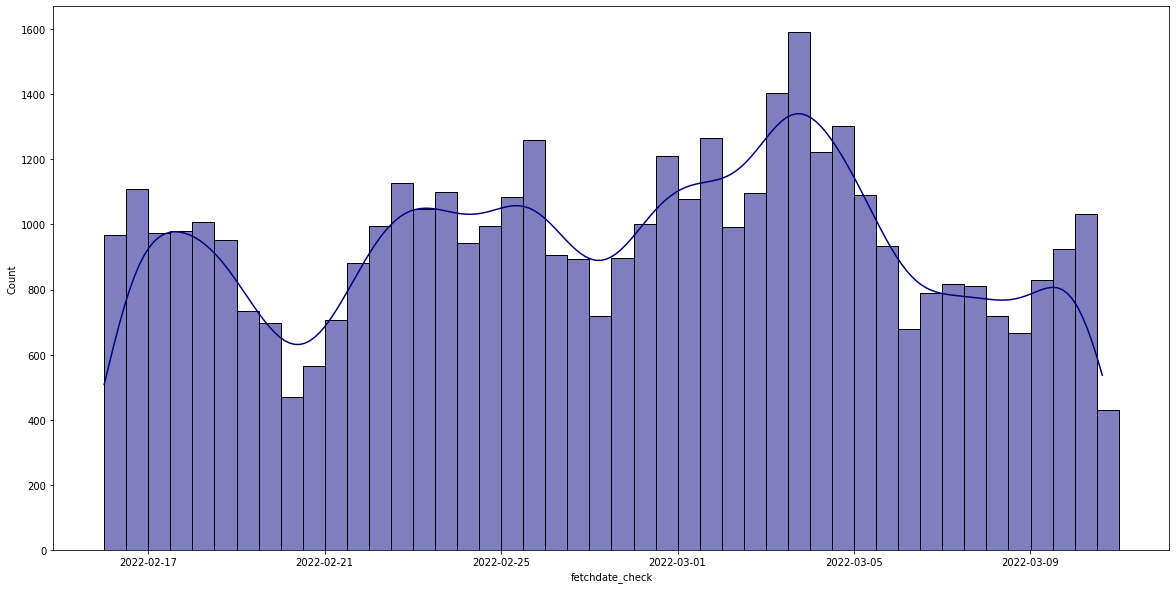

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.histplot(data=data_for_analysis, x="fetchdate_check", color = 'navy',binwidth = 0.5, kde = True)
plt.show()


In [34]:
list_of_media = pd.DataFrame(data_for_analysis.page_domain_root.value_counts())

result = list_of_media.to_csv()

with open("list_of_media", "w") as new_file:
    new_file.write(result)


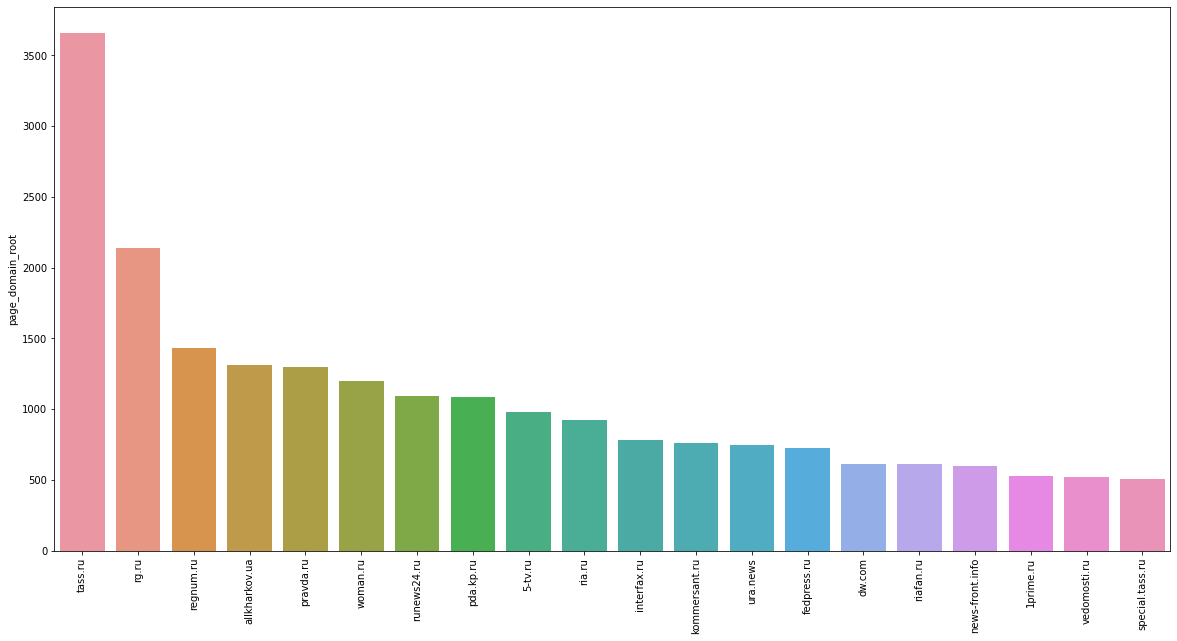

In [35]:

plt.figure(figsize=(20, 10))
sns.barplot(data=list_of_media.head(20), x=list_of_media.head(20).index, y="page_domain_root")
plt.xticks(rotation=90)
plt.show()


Строим облака из слов по заголовкам новостей

In [3]:
import json
import numpy as np
import pandas as pd
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from collections import Counter
import pymorphy2
from datetime import datetime

In [11]:
cloud = pd.DataFrame()
with open('media_test.json', 'r') as file:
    for line in file:      
        data = json.loads(line)
        df = pd.json_normalize(data)
        cloud = pd.concat([cloud, df], sort = False, axis = 0)

In [12]:
cloud = cloud.reset_index().drop(columns = ['index'])

def change_time(dt):
  dt_new = dt.replace(' UTC', '')
  return datetime.strptime(dt_new, '%Y-%m-%d %H:%M:%S')

cloud['fetchdate_orig'] = cloud['fetchdate_orig'].apply(change_time)
cloud['fetchdate_check'] = cloud['fetchdate_check'].apply(change_time)

Облако для оригинальных заголовков

In [6]:
text = " ".join(review for review in cloud.page_title)

morph = pymorphy2.MorphAnalyzer()

def normal_rus(w):
    res = morph.parse(w)
    for r in res:
        if 'NOUN' in r.tag:
            return r.normal_form
    return None

stopwords = ['в', 'и', 'с', 'о', 'иза', 'по', 'к', 'об', 'на', 'со', 'ли']
    
c_dict = Counter()
for w in text.split():
    n = normal_rus(w)
    if n is not None and n not in stopwords:
        c_dict[n] += 1


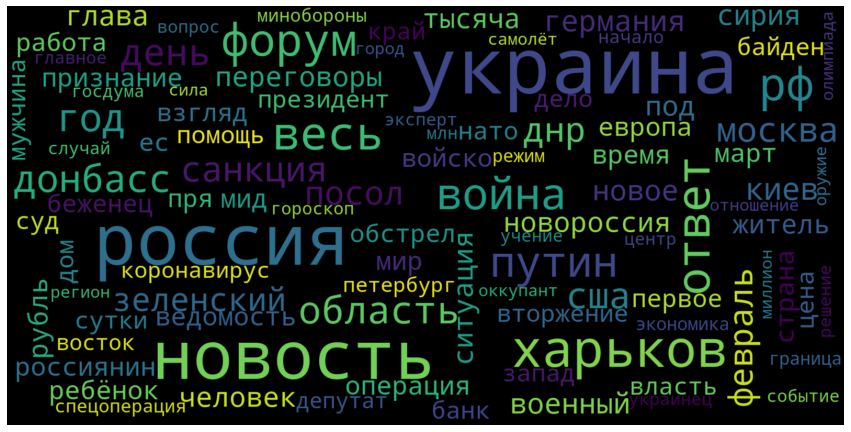

[('украина', 4138),
 ('россия', 3291),
 ('новость', 2931),
 ('харьков', 1590),
 ('ответ', 1270),
 ('весь', 1229),
 ('рф', 1200),
 ('форум', 1183),
 ('война', 1116),
 ('путин', 1067),
 ('год', 871),
 ('область', 855),
 ('донбасс', 841),
 ('день', 820),
 ('сша', 775),
 ('санкция', 728),
 ('днр', 704),
 ('москва', 692),
 ('посол', 644),
 ('февраль', 642),
 ('зеленский', 596),
 ('киев', 565),
 ('германия', 511),
 ('военный', 485),
 ('новое', 480),
 ('глава', 454),
 ('сирия', 446),
 ('ситуация', 426),
 ('новороссия', 424),
 ('под', 423),
 ('человек', 417),
 ('переговоры', 415),
 ('тысяча', 401),
 ('житель', 391),
 ('рубль', 385),
 ('март', 377),
 ('операция', 372),
 ('европа', 366),
 ('россиянин', 362),
 ('страна', 356),
 ('время', 350),
 ('признание', 347),
 ('ведомость', 341),
 ('мид', 340),
 ('ребёнок', 335),
 ('мир', 331),
 ('взгляд', 318),
 ('войско', 316),
 ('работа', 315),
 ('ес', 311),
 ('пря', 298),
 ('нато', 297),
 ('беженец', 295),
 ('обстрел', 289),
 ('первое', 285),
 ('сутки', 

In [7]:
common = c_dict.most_common(100)

wordcloud = WordCloud(width=1600, height=800, max_font_size=150).generate_from_frequencies(dict(common))

plt.figure( figsize=(15,8) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

common

Облако для измененных заголовков

In [8]:
text = " ".join(review for review in cloud.title_new)

morph = pymorphy2.MorphAnalyzer()

def normal_rus(w):
    res = morph.parse(w)
    for r in res:
        if 'NOUN' in r.tag:
            return r.normal_form
    return None

stopwords = ['в', 'и', 'с', 'о', 'иза', 'по', 'к', 'об', 'на', 'со', 'ли']
    
c_dict = Counter()
for w in text.split():
    n = normal_rus(w)
    if n is not None and n not in stopwords:
        c_dict[n] += 1


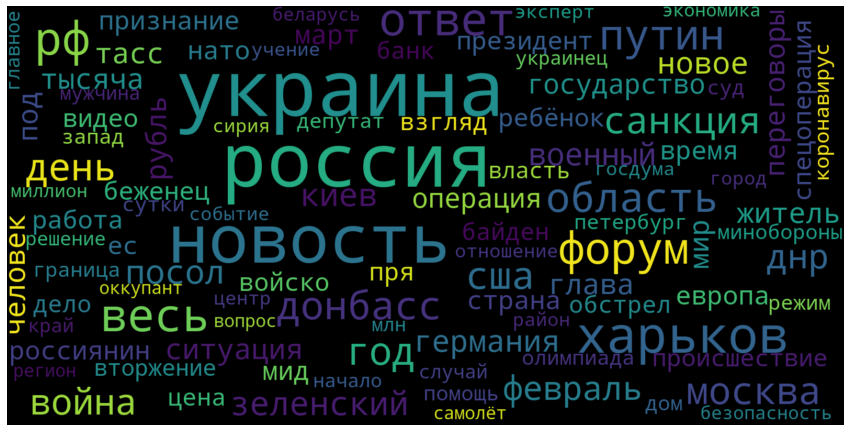

[('украина', 4286),
 ('россия', 3897),
 ('новость', 3084),
 ('харьков', 1600),
 ('рф', 1296),
 ('весь', 1278),
 ('ответ', 1269),
 ('форум', 1188),
 ('путин', 1069),
 ('область', 1024),
 ('донбасс', 958),
 ('год', 936),
 ('сша', 905),
 ('день', 883),
 ('москва', 881),
 ('санкция', 863),
 ('война', 805),
 ('днр', 741),
 ('февраль', 696),
 ('посол', 695),
 ('зеленский', 682),
 ('киев', 659),
 ('военный', 591),
 ('новое', 576),
 ('германия', 573),
 ('тасс', 513),
 ('глава', 507),
 ('человек', 503),
 ('тысяча', 500),
 ('ситуация', 500),
 ('житель', 491),
 ('рубль', 475),
 ('под', 459),
 ('мир', 454),
 ('переговоры', 447),
 ('государство', 431),
 ('операция', 429),
 ('март', 413),
 ('страна', 393),
 ('признание', 389),
 ('россиянин', 385),
 ('европа', 381),
 ('нато', 375),
 ('время', 374),
 ('мид', 373),
 ('работа', 355),
 ('президент', 353),
 ('ребёнок', 349),
 ('беженец', 346),
 ('ес', 340),
 ('видео', 338),
 ('пря', 330),
 ('войско', 327),
 ('спецоперация', 326),
 ('происшествие', 317),
 

In [9]:
common = c_dict.most_common(100)

wordcloud = WordCloud(width=1600, height=800, max_font_size=150).generate_from_frequencies(dict(common))

plt.figure( figsize=(15,8) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

common
